In [2]:
from imports import *
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from datetime import datetime
from dateutil.tz import *
from dateutil import tz

In [3]:
df = pd.read_csv(r"../data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)
vsteps = Steps.read_dataframe(df,'enter','leave')

df.shape

(1229, 3)

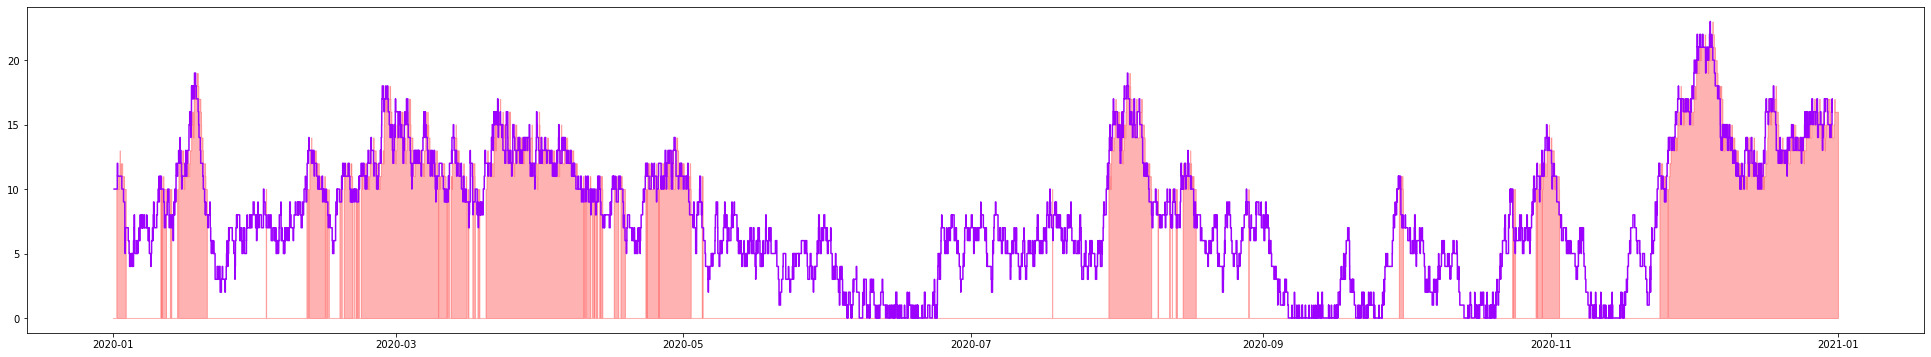

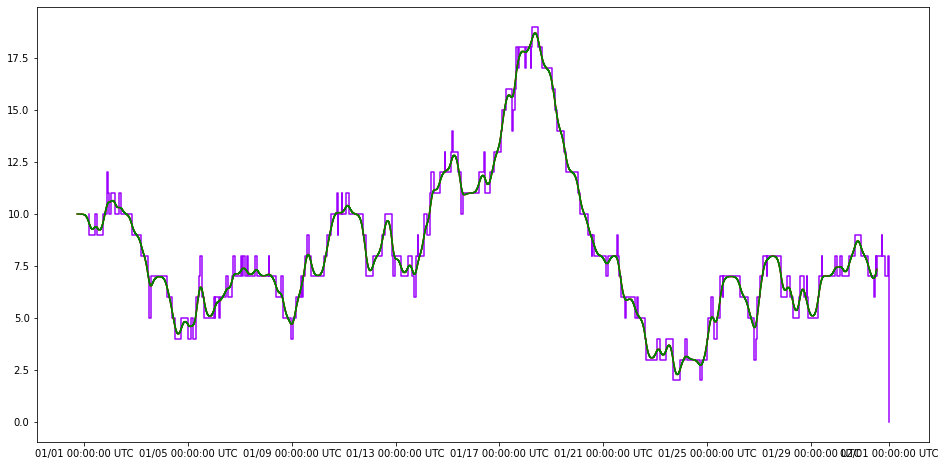

In [5]:
t = np.arange(pd.Timestamp(2020,1,1),pd.Timestamp(2021,1,1),pd.Timedelta(hours=1)).astype(pd.Timestamp)

vsteps_clipped = vsteps.clip(ubound=pd.Timestamp(2020,2,1))
ax = vsteps.plot(size=(34,6))
#vsteps_clipped_shift = (vsteps_clipped<<pd.Timedelta(hours=11))
#(vsteps >= 10).plot(ax=ax,color='r')
ax.fill_between(t,(vsteps >= 10).step(t),color='r',step='post',alpha=0.3)
#ax = vsteps.plot(size=(42,6),method='function',ts_grain = pd.Timedelta(hours=1),color='g')
#vsteps.plot(ax=ax, color='r')


#vsteps_clipped.smooth_plot(ax=ax,ts_grain = pd.Timedelta(minutes=10),color='g')
ax2 = vsteps_clipped.plot()
vsteps_clipped.smooth_plot(ax=ax2,color='r')
t = np.arange(pd.Timestamp(2020,1,1),pd.Timestamp(2020,2,1),pd.Timedelta(hours=1)).astype(pd.Timestamp)
vsteps_clipped.smooth_plot(ax=ax2,color='g')
#ax2.step(t,vsteps_clipped(t),color='g')

formatter = mdates.DateFormatter('%m/%d %T %Z', tz=tzutc())
#date_form = DateFormatter('%d-%m')
ax2.xaxis.set_major_formatter(formatter)

#plt.gca().xaxis.set_major_formatter(formatter)


In [11]:
vsteps._cummulative[pd.Timestamp(1999,12,31,12,59)]

KeyError: Timestamp('1999-12-31 12:59:00')

In [ ]:
#vsteps_clipped
dat = pd.Timestamp(2020,1,1)
print(vsteps_clipped.smooth_step(dat))
print(vsteps_clipped.step(dat))
print(vsteps.smooth_step(dat))
print(vsteps.step(dat))


In [ ]:
tz.gettz('US/Pacific')

In [ ]:
data = vsteps.step_keys()
dt_deltas = np.diff(data)
dt_deltas = [d.total_seconds()/60 for d in dt_deltas]


In [ ]:
sns.histplot(x=dt_deltas)

In [ ]:
t = np.arange(pd.Timestamp(2020,12,31),pd.Timestamp(2021,1,5),pd.Timedelta(minutes=15)).astype(pd.Timestamp)

fig,ax = plt.subplots(ncols=4, figsize=(18,4))
fig2,ax2 = plt.subplots(ncols=3, figsize=(18,4))

s1 = Step(end=pd.Timestamp(2021,1,3))
s1a = Step(use_datetime=True)

s2 = Step(start=pd.Timestamp(2021,1,1),end=pd.Timestamp(2021,1,4))
s3 = Step(start=pd.Timestamp(2021,1,2))

st =Steps(use_datetime=True).add([s1,s1a,s2])
sta =Steps(use_datetime=True).add([s1a,s3,s2])

ax[0].step(t,s2.smooth_step(t,smooth_factor=200))
ax[1].step(t,s3(t))
ax[2].step(t,s1(t))
ax[3].step(t,s1a(t))

st.plot(ax=ax2[0])
ax2[1].step(t,st.smooth_step(t,smooth_factor=20000))
ax2[2].step(t,sta.smooth_step(t,smooth_factor=10000))

date_form = DateFormatter('%m|%d')
ax[0].xaxis.set_major_formatter(date_form)
ax[1].xaxis.set_major_formatter(date_form)
ax[2].xaxis.set_major_formatter(date_form)

ax2[0].xaxis.set_major_formatter(date_form)
ax2[1].xaxis.set_major_formatter(date_form)
ax2[2].xaxis.set_major_formatter(date_form)



In [ ]:
st

In [ ]:
#import cupy as cp
fig,ax = plt.subplots(ncols=2)
t = np.arange(-10,10,0.1)
si = Step(end=4,weight=(1,-1))
sp = Step(start=2)

ax[0].step(t,(si)(t))
ax[0].step(t,sp(t))
ax[1].step(t,(si*sp)(t))
